In [ ]:
**숙제**

* "week7_assignment_data.xlsx" 파일을 읽어 TM20값과 rel_KD값을 2차원 데이터로 그림
* 우측과 상부에 barplot을 그리시오
* combined가 0일 경우 빈 마커, 1일 경우 꽉 찬 마커로 표기
* "fig4_revised.tiff"을 참고하여 그리시오
* 위 그림에서 CoDAH 데이터만 그림림터만 그림

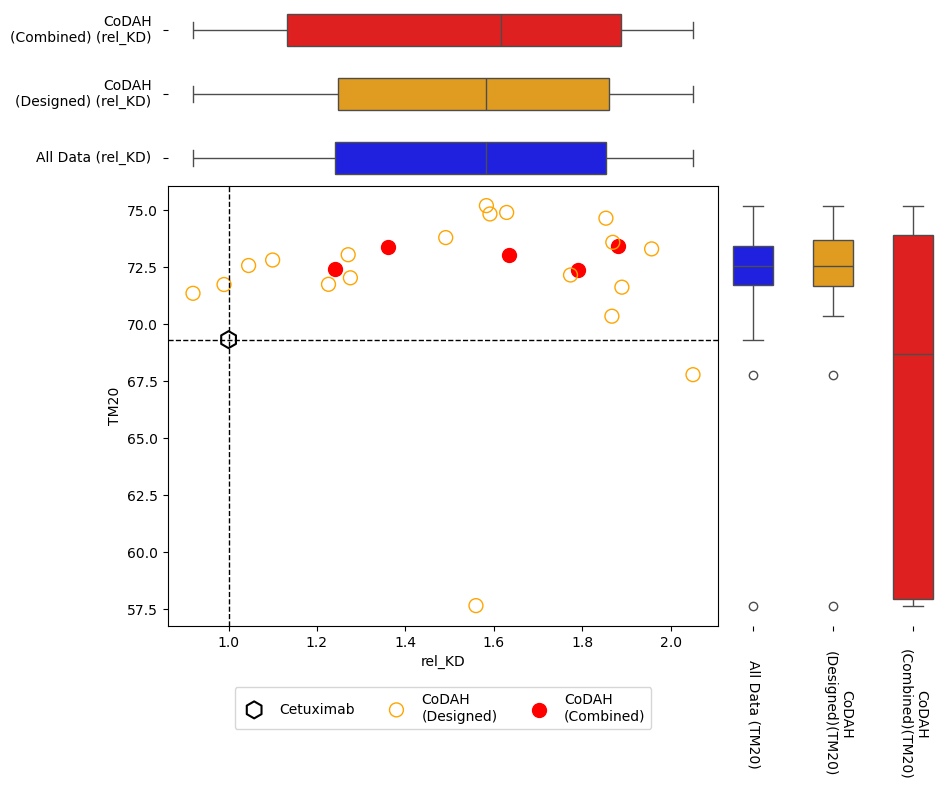

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_excel('week7_assignment_data.xlsx')

data.iloc[0,4]=2

combined_0 = data[data['combined'] == 0]
combined_1 = data[data['combined'] == 1]
combined_2 = data[data['combined'] == 2]

fig = plt.figure(figsize=(10, 8))

ax_scatter = fig.add_axes([0.1, 0.1, 0.55, 0.55])

ax_scatter.scatter(combined_1['rel_KD'], combined_1['TM20'], s=100, color='red', label='Combined 1', marker='o')
plt.xlabel('rel_KD')
ax_scatter.scatter(combined_0['rel_KD'], combined_0['TM20'], s=100, facecolors='none', edgecolors='orange', label='Combined 0', marker='o')
plt.ylabel('TM20')

for idx, row in combined_2.iterrows():
    ax_scatter.axhline(y=row['TM20'], color='black', linestyle='--', linewidth=1, label='Horizontal Line' if idx == combined_2.index[0] else "")
    ax_scatter.axvline(x=row['rel_KD'], color='black', linestyle='--', linewidth=1, label='Vertical Line' if idx == combined_2.index[0] else "")
    ax_scatter.scatter(row['rel_KD'], row['TM20'], s=150, facecolors='none', edgecolors='black', label='Combined 2', marker='h', linewidths=1.5)

ax_box_x_total = fig.add_axes([0.1, 0.66, 0.55, 0.05])
ax_box_x_total.text(-0.03, 0.5, "All Data (rel_KD)", va='center', ha='right', transform=ax_box_x_total.transAxes)
ax_box_x_total.set_xticks([])
ax_box_x_total.set_xticklabels([])

ax_box_x_0 = fig.add_axes([0.1, 0.74, 0.55, 0.05])
ax_box_x_0.text(-0.03, 0.5, "CoDAH\n(Designed) (rel_KD)", va='center', ha='right', transform=ax_box_x_0.transAxes)
ax_box_x_0.set_xticks([])
ax_box_x_0.set_xticklabels([])

ax_box_x_1 = fig.add_axes([0.1, 0.82, 0.55, 0.05])
ax_box_x_1.text(-0.03, 0.5, "CoDAH\n(Combined) (rel_KD)", va='center', ha='right', transform=ax_box_x_1.transAxes)

ax_box_x_1.set_xticks([])
ax_box_x_1.set_xticklabels([])

sns.boxplot(x=data['rel_KD'], ax=ax_box_x_total, color='blue')
sns.boxplot(x=combined_0['rel_KD'], ax=ax_box_x_0, color='orange')
sns.boxplot(x=combined_1['rel_KD'], ax=ax_box_x_1, color='red')

ax_box_y_total = fig.add_axes([0.66, 0.1, 0.05, 0.55])
ax_box_y_total.text(0.5,-0.2, "All Data (TM20)", va='center', ha='center', transform=ax_box_y_total.transAxes, rotation=-90)

ax_box_y_total.set_yticks([])
ax_box_y_total.set_yticklabels([])

ax_box_y_0 = fig.add_axes([0.74, 0.1, 0.05, 0.55])
ax_box_y_total.text(2.2, -0.2, "CoDAH\n(Designed)(TM20)", va='center', ha='center', transform=ax_box_y_total.transAxes, rotation=-90)

ax_box_y_0.set_yticks([])
ax_box_y_0.set_yticklabels([])

ax_box_y_1 = fig.add_axes([0.82, 0.1, 0.05, 0.55])
ax_box_y_total.text(3.7, -0.2, "CoDAH\n(Combined)(TM20)", va='center', ha='center', transform=ax_box_y_total.transAxes, rotation=-90)

ax_box_y_1.set_yticks([])
ax_box_y_1.set_yticklabels([])


sns.boxplot(y=data['TM20'], ax=ax_box_y_total, color='blue')
sns.boxplot(y=combined_0['TM20'], ax=ax_box_y_0, color='orange')
sns.boxplot(y=combined_1['TM20'], ax=ax_box_y_1, color='red')

for spine in ax_box_x_total.spines.values():
    spine.set_visible(False)
for spine in ax_box_y_total.spines.values():
    spine.set_visible(False)
for spine in ax_box_x_0.spines.values():
    spine.set_visible(False)
for spine in ax_box_y_0.spines.values():
    spine.set_visible(False)
for spine in ax_box_x_1.spines.values():
    spine.set_visible(False)
for spine in ax_box_y_1.spines.values():
    spine.set_visible(False)
    
handles, labels = ax_scatter.get_legend_handles_labels()

filtered_handles_labels = [
    (handles[4], 'Cetuximab'),
    (handles[1], 'CoDAH\n(Designed)'),
    (handles[0], 'CoDAH\n(Combined)'),
    
    
]

new_handles, new_labels = zip(*filtered_handles_labels)

ax_scatter.legend(new_handles, new_labels, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.25))

plt.show()